In [1]:
# Imports
from osgeo import gdal, gdal_array

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import glob
from PIL import Image
import cv2
import numpy as np

In [2]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor
import numpy as np
def visualise_rgb(img,clip=[0.3,0.3,0.3],display=True):
        """Visulaise RGB image with given clip values and return image"""

        # Scale image
        img = np.clip(img/10000,0,10)
        
        # Get RGB channels
        rgb = img[[3,2,1]]

        #clip rgb values
        rgb[0] = np.clip(rgb[0],0,clip[0])/clip[0]
        rgb[1] = np.clip(rgb[1],0,clip[1])/clip[1]
        rgb[2] = np.clip(rgb[2],0,clip[2])/clip[2]

        rgb = rgb.transpose(1,2,0)

        plt.imshow(rgb)
        plt.title("RGB Image")
        plt.axis('off')
        plt.show()

        return rgb

# Example usage
file_path = './LandInsidePolygon_StillwaterAirport.tif'


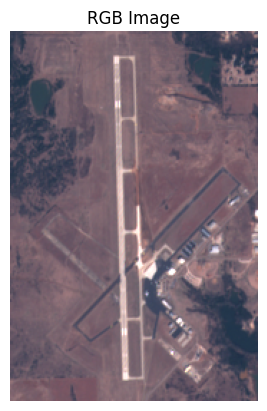

In [3]:
img = gdal.Open(file_path).ReadAsArray()
rgb_3 = visualise_rgb(img,[0.3,0.3,0.3],display=True )

In [4]:
import rasterio
dataset = rasterio.open(file_path)
#left edge
print(dataset.bounds[0])
#bottom edge
print(dataset.bounds[1])
#right edge
print(dataset.bounds[2])
#top edge
print(dataset.bounds[3])

671320.0
4002350.0
673050.0
4004930.0


In [5]:
import rasterio
from rasterio.transform import Affine
from pyproj import Transformer

def pixel_to_gps(file_path, x_pixel, y_pixel):
    """
    Convert pixel coordinates to GPS (latitude and longitude) coordinates.

    Args:
    - file_path: Path to the GeoTIFF file.
    - x_pixel, y_pixel: Pixel coordinates in the image.

    Returns:
    - A tuple of (longitude, latitude).
    """
    with rasterio.open(file_path) as dataset:
        # Get the affine transform for the dataset
        transform = dataset.transform

        # Convert pixel coordinates to the CRS of the GeoTIFF
        x_crs, y_crs = transform * Affine.translation(0.5, 0.5) * (x_pixel, y_pixel)

        # Initialize transformer to convert from the CRS of the GeoTIFF to WGS84
        # Replace 'dataset.crs' with the correct CRS if necessary
        transformer = Transformer.from_crs(dataset.crs, 'EPSG:4326', always_xy=True)

        # Convert from CRS to WGS84
        longitude, latitude = transformer.transform(x_crs, y_crs)

    return longitude, latitude

# Example usage
x_pixel, y_pixel = 100, 50  # Example pixel coordinates
longitude, latitude = pixel_to_gps(file_path, x_pixel, y_pixel)
print(f"Longitude: {longitude}, Latitude: {latitude}")


Longitude: -97.08399504940022, Latitude: 36.16927825335691


In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.transform import from_origin
from pyproj import Transformer

# Open the GeoTIFF file
dataset = rasterio.open(file_path)

# Read the raster data as an array
image = dataset.read(1)

# Setup the transformer to convert from the dataset's CRS to WGS84
transformer = Transformer.from_crs(dataset.crs, 'EPSG:4326', always_xy=True)

fig, ax = plt.subplots()
im = ax.imshow(image, cmap='gray') # Adjust the colormap as needed

def onclick(event):
    if event.xdata is not None and event.ydata is not None:
        # Convert pixel coordinates to the CRS of the GeoTIFF
        x_crs, y_crs = dataset.transform * (event.xdata, event.ydata)
        
        # Convert from CRS to WGS84
        longitude, latitude = transformer.transform(x_crs, y_crs)
        
        print(f'Longitude: {longitude}, Latitude: {latitude}')
        # Optionally, you can also display this information directly on the plot
        ax.plot(event.xdata, event.ydata, 'ro')  # mark the clicked position
        plt.text(event.xdata, event.ydata, f'({longitude:.5f}, {latitude:.5f})', color='white')

cid = fig.canvas.mpl_connect('button_press_event', onclick)

<IPython.core.display.Javascript object>